In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Налаштування для коректного відображення української мови
plt.rcParams['font.family'] = 'DejaVu Sans'


In [2]:
# Завантажуємо дані
df = pd.read_csv("operational_data.csv", parse_dates=["date"])

# Перевіряємо перші 5 рядків
print("Перші 5 рядків таблиці:")
print(df.head())

# Загальна інформація про дані
print("\nЗагальна інформація про DataFrame:")
print(df.info())


ValueError: Missing column provided to 'parse_dates': 'date'

In [5]:
import pandas as pd

# Завантажуємо дані з урахуванням табуляції як розділювача
df = pd.read_csv("operational_data.csv", sep="\t", parse_dates=["date"], encoding="utf-8-sig")

# Перевіряємо перші 5 рядків таблиці
print("Перші 5 рядків таблиці:")
print(df.head())

# Загальна інформація про дані
print("\nЗагальна інформація про DataFrame:")
print(df.info())


Перші 5 рядків таблиці:
        date   zone           category   priority  units_engaged
0 2025-08-29   Бета   Наземний контакт  Критичний             19
1 2025-08-20  Альфа   Наземний контакт    Високий             34
2 2025-08-22  Омега  Втрата постачання   Середній             26
3 2025-08-28  Гамма   Наземний контакт    Низький             37
4 2025-08-04  Омега  Втрата постачання   Середній              4

Загальна інформація про DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           134 non-null    datetime64[ns]
 1   zone           134 non-null    object        
 2   category       134 non-null    object        
 3   priority       134 non-null    object        
 4   units_engaged  134 non-null    int64         
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 5.4+ KB
None


In [6]:
priority_counts = df['priority'].value_counts()
print("\nКількість подій по кожному рівню пріоритету:")
print(priority_counts)



Кількість подій по кожному рівню пріоритету:
priority
Критичний    36
Середній     35
Високий      33
Низький      30
Name: count, dtype: int64


In [7]:
zone_counts = df['zone'].value_counts()
least_active_zone = zone_counts.idxmin()
print(f"\nНайменш активна зона: {least_active_zone} (усього {zone_counts.min()} подій)")



Найменш активна зона: Омега (усього 14 подій)


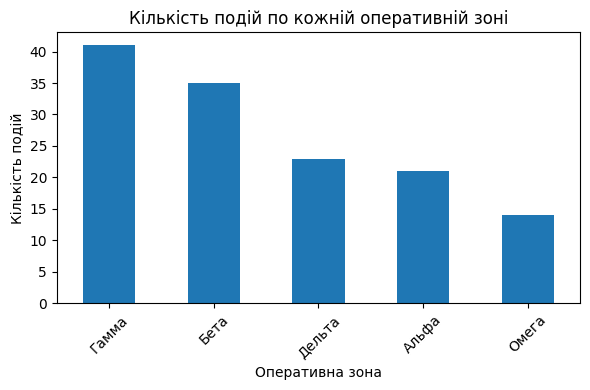

In [8]:
plt.figure(figsize=(6,4))
zone_counts.plot(kind='bar')
plt.title("Кількість подій по кожній оперативній зоні")
plt.xlabel("Оперативна зона")
plt.ylabel("Кількість подій")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


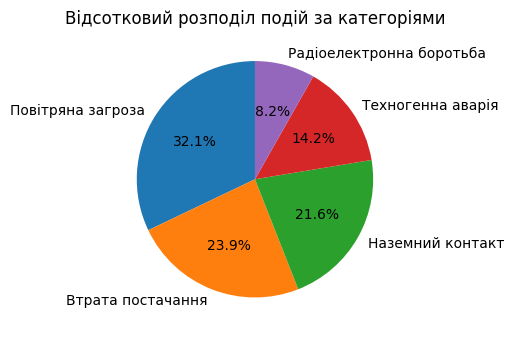

In [9]:
plt.figure(figsize=(5,5))
category_counts = df['category'].value_counts()
category_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title("Відсотковий розподіл подій за категоріями")
plt.ylabel("")  # забираємо зайвий підпис осі Y
plt.tight_layout()
plt.show()


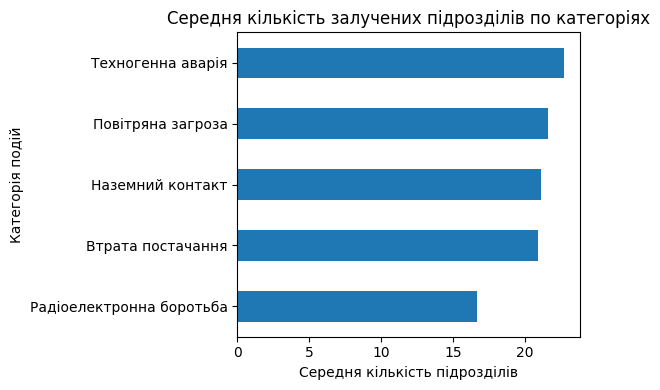

In [10]:
plt.figure(figsize=(6,4))
avg_units = df.groupby('category')['units_engaged'].mean().sort_values()
avg_units.plot(kind='barh')
plt.title("Середня кількість залучених підрозділів по категоріях")
plt.xlabel("Середня кількість підрозділів")
plt.ylabel("Категорія подій")
plt.tight_layout()
plt.show()


### Висновки

- Найменш активною є зона **`{{least_active_zone}}`**.  
- Найбільше ресурсів (підрозділів) вимагають події категорії **"{avg_units.idxmax()}"**,  
  тоді як найчастішою категорією є **"{category_counts.idxmax()}"**.  
- Загалом, розподіл подій вказує на **пріоритетні напрями для концентрації сил**.


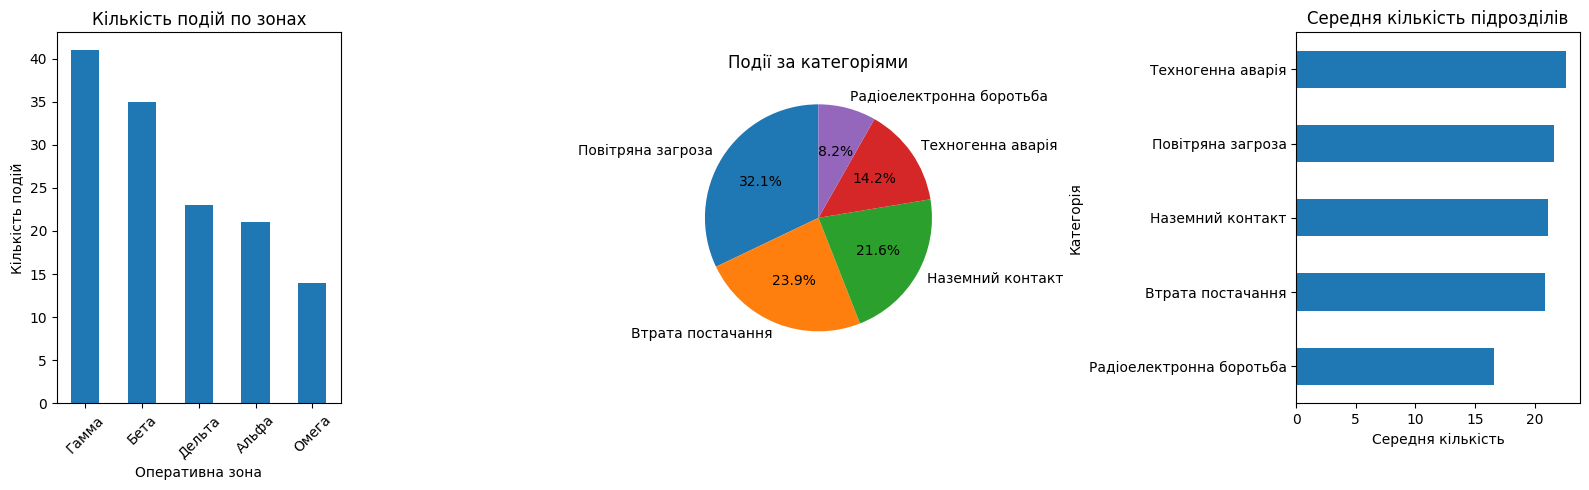

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# --- 1. Завантажуємо CSV (приклад з твоїми даними) ---
df = pd.read_csv("operational_data.csv", sep="\t", parse_dates=["date"], encoding="utf-8-sig")

# --- 2. Аналіз даних ---
zone_counts = df['zone'].value_counts()
category_counts = df['category'].value_counts()
avg_units = df.groupby('category')['units_engaged'].mean().sort_values()

# --- 3. Побудова всіх графіків на одному листі ---
fig, axes = plt.subplots(1, 3, figsize=(16, 5))  # 1 рядок, 3 стовпці

# 3.1. Стовпчаста діаграма по зонах
zone_counts.plot(kind='bar', ax=axes[0])
axes[0].set_title("Кількість подій по зонах")
axes[0].set_xlabel("Оперативна зона")
axes[0].set_ylabel("Кількість подій")
axes[0].tick_params(axis='x', rotation=45)

# 3.2. Кругова діаграма по категоріях
category_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, ax=axes[1])
axes[1].set_title("Події за категоріями")
axes[1].set_ylabel("")  # забираємо зайвий підпис осі Y

# 3.3. Горизонтальна стовпчаста діаграма середньої кількості підрозділів
avg_units.plot(kind='barh', ax=axes[2])
axes[2].set_title("Середня кількість підрозділів")
axes[2].set_xlabel("Середня кількість")
axes[2].set_ylabel("Категорія")

plt.tight_layout()
plt.show()
